# CS 696 Project
## Titanic: Machine Learning from Disaster

[![]( https://img.shields.io/badge/Python-v3.7-orange)]()
[![](https://img.shields.io/badge/pandas-v1-blue)]()
[![](https://img.shields.io/badge/sklearn-v0.2-red)]()

#### Parth Thummar  824679473
#### leyu,lin(Jack) 817372912

***

## Index
*  <b>Introduction</b>
  * [DataSet Source](https://www.kaggle.com/c/titanic)
      * Imports
      * <a href="#fp">File Path</a>
  * <a href="#check">Data Checking</a>
      * Miss values
  * <a href="#model">Obersvation & Questions</a>
        * <a href="#Q1">Question 1</a>
        * <a href="#Q2">Question 2</a>
        * <a href="#Q3">Question 3</a>
        * <a href="#Q4">Question 4</a>
        * <a href="#Q5">Question 5</a>
        * <a href="#Q6">Question 6</a>
  * <a href="#TT">Fix Missing Values</a>
        * Randomforest fill values
  * <a href="#ML">ML Solve Problem</a>
        * <a href="#LR">Logistic Regression</a>
        * <a href="#DT">Random Forest</a>
* <b><a href="#End">Difficulties Faced & Thoughts</a></b>

***

### Introduction

(paraphase this lol also read my type if there error fix it or not make sense paraphse it thx)
(also if u see some question name not make sense, change it and plot titles... I cant think of lol)
(if u see resuced or survived those two words I may put wrong if u see fix it)

This is classic challenge from kaggle. I though was interesting because
it actully may follow some rules. Like how people attract to titanic. 
age,gender may affects. Since young male usually strongier that old female.
kids may affects. Parents consider their kid live frist.
ppl who buy ticket of higher class may affect survibilities

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas import DataFrame,Series

### <a name="fp">File Path</a>

In [2]:
df_data = pd.read_csv("train.csv")    
df_test = pd.read_csv("test.csv")    

### <a name="check">Data Checking</a>

In [3]:
df_data.columns                       
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### <a name="MV">Missing Values</a>
Age is not 891
Cabin is not 891
Embarked is not 891
* if value too high may just delete it
* if value not numeric add NaN column
* In this case age is increasing series. may add step of 0.5 or
add some value base on value we have, since data set was not large
probably not goode idea

In [4]:
df_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### <a name="model">Obersvation & Questions</a>

I put questions may interested below

#### <a name="Q1">1. Does Embarked City,passenger class level,sex associated with number of people survived?</a>

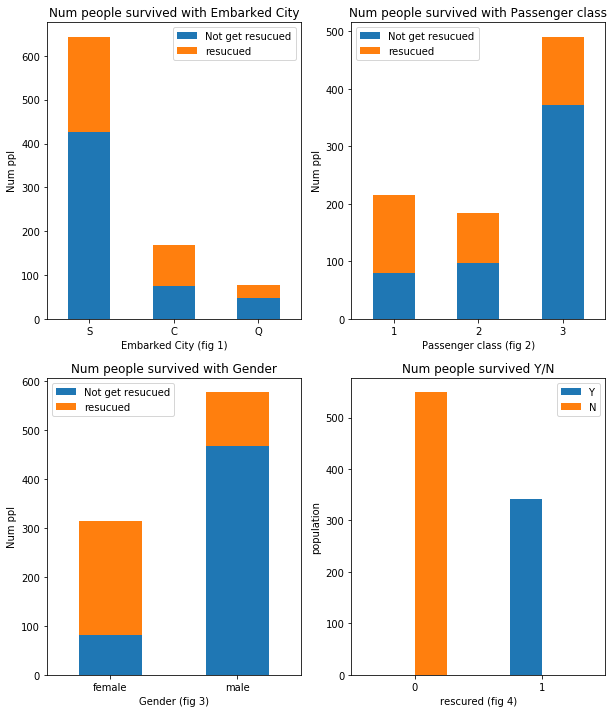

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# Embarked City
Survived_0_ec=df_data.Embarked [df_data.Survived==0]
Survived_1_ec=df_data.Embarked [df_data.Survived==1]
df=DataFrame({'Not get resucued':Survived_0_ec.value_counts(),
              'resucued':Survived_1_ec.value_counts()})

p1= df.plot(kind='bar',
        stacked=True,
        figsize=(10,12),
        rot=0,
        ax=axes[0,0])
p1.set_xlabel("Embarked City (fig 1)") 
p1.set_ylabel("Num ppl")
p1.set_title("Num people survived with Embarked City")


# Passenger class
Survived_0_pc=df_data.Pclass [df_data.Survived==0]
Survived_1_pc=df_data.Pclass [df_data.Survived==1]
df=DataFrame({'Not get resucued':Survived_0_pc.value_counts(),
              'resucued':Survived_1_pc.value_counts()})

p2= df.plot(kind='bar',
        stacked=True,
        figsize=(10,12),
        rot=0,
        ax=axes[0,1])

p2.set_xlabel("Passenger class (fig 2)") 
p2.set_ylabel("Num ppl")
p2.set_title("Num people survived with Passenger class")


# Gender
Survived_0_sx=df_data.Sex [df_data.Survived==0]
Survived_1_sx=df_data.Sex [df_data.Survived==1]
df=DataFrame({'Not get resucued':Survived_0_sx.value_counts(),
              'resucued':Survived_1_sx.value_counts()})

p3= df.plot(kind='bar',
        stacked=True,
        figsize=(10,12),
        rot=0,
        ax=axes[1,0])

p3.set_xlabel("Gender (fig 3)") 
p3.set_ylabel("Num ppl")
p3.set_title("Num people survived with Gender")


# Without all three above
Survived_N= df_data.Survived[df_data.Survived==0]
Survived_Y= df_data.Survived[df_data.Survived==1]
df=DataFrame({'Y':Survived_Y.value_counts(),
              'N':Survived_N.value_counts()})
p4= df.plot(kind='bar',
        figsize=(10,12),
        rot=0,
        ax=axes[1,1])

p4.set_xlabel("rescured (fig 4)")
p4.set_ylabel("population")
p4.set_title("Num people survived Y/N")

plt.legend(loc='upper right')
plt.show()

#### Fig 1. 
resuced rate C> S > Q
From [Wiki list](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) we know 
C stands for Cherbourg, S stands for Southampton, Q stands for Queenstown.
Cherbourg seems best Embarked City

#### Fig 2. 
resuced rate 1 > 2 > 3
Passenger class 3 has many people not getting resuced

#### Fig 3. 
resuced rate female >> male
female passenger has significant rate get resuced compare to male 

#### Fig 4. 
total resuced more than people not get resuced

#### <a name="Q2">2. From question 1 Cherbourg has best resuced rate, Class 1 has best resuced rate. what rate of passenger each class has in each Embarked City? Does it associated with resuced rate?</a>

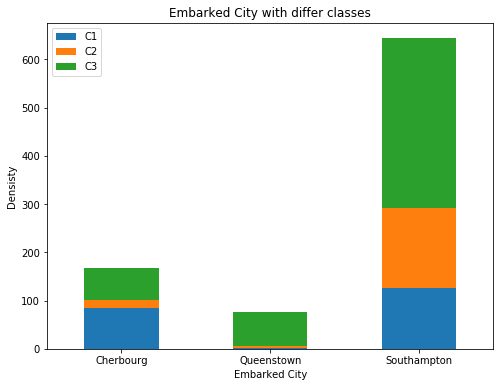

In [6]:
Pc1=df_data.Embarked [df_data.Pclass==1]
Pc2=df_data.Embarked [df_data.Pclass==2]
Pc3=df_data.Embarked [df_data.Pclass==3]

df=DataFrame({'C1':Pc1.value_counts(),
              'C2':Pc2.value_counts(),
              'C3':Pc3.value_counts()})

#replace names with letters
df.index = {'Cherbourg':'C','Queenstown':'Q','Southampton':'S'}

df.plot(kind='bar',
        stacked=True,
        figsize=(8,6),
        rot=0)

plt.xlabel("Embarked City") 
plt.ylabel("Densisty")
plt.title("Embarked City with differ classes")
plt.show()

#### From fig above. Queenstown City seems not class 1, this may have huge impact on overall rate 

In [7]:
# check this city how many class 1 it has
df_data[(df_data.Pclass==1) & (df_data.Embarked =='Q')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0,C78,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0,C78,Q


Only 2 passenger is class 1 in Queenstown City, fig2 result may affected

#### <a name="Q3">3. From question 2 Only 2 passengers in Queenstwon City is class 1. Why so? Does it do with tickect price?</a>

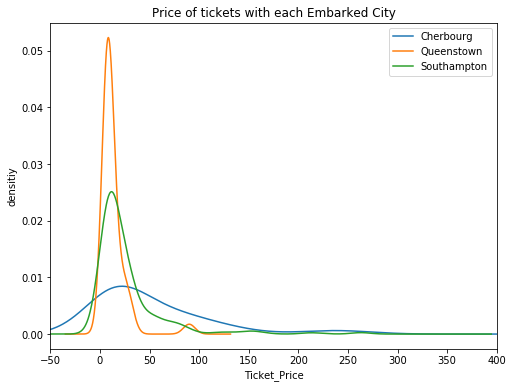

In [8]:
ticket_price_C =df_data.Fare[df_data.Embarked =='C']
ticket_price_Q =df_data.Fare[df_data.Embarked =='Q']
ticket_price_S =df_data.Fare[df_data.Embarked =='S']

df=DataFrame({'Cherbourg':ticket_price_C,
              'Queenstown':ticket_price_Q,
              'Southampton':ticket_price_S})

df.plot(kind='kde',xlim=[-50,400],figsize=(8,6))
plt.xlabel("Ticket_Price") 
plt.ylabel("densitiy")
plt.title("Price of tickets with each Embarked City")
plt.show()

Queenstown City price most at 0 - 50, Why class 1 is only 2 passenger. We can infer class 1 may have highest price?

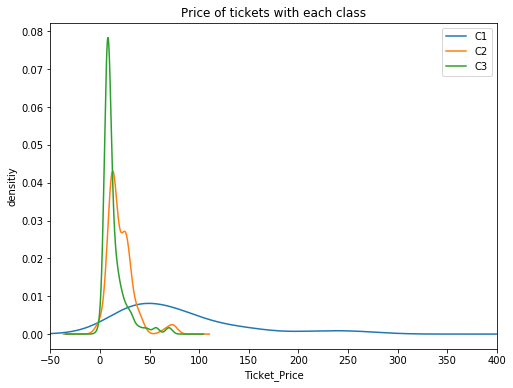

In [9]:
#check class 1 associated with price 
ticket_price_p1 =df_data.Fare[df_data.Pclass==1]
ticket_price_p2 =df_data.Fare[df_data.Pclass==2]
ticket_price_p3 =df_data.Fare[df_data.Pclass==3]
df=DataFrame({'C1':ticket_price_p1,
              'C2':ticket_price_p2,
              'C3':ticket_price_p3})

df.plot(kind='kde',xlim=[-50,400],figsize=(8,6))

plt.xlabel("Ticket_Price") 
plt.ylabel("densitiy")
plt.title("Price of tickets with each class")
plt.show()

Class 1 has very low at 0-50 thats may be the reason Queenstwon City may has few class 1 passengers

#### <a name="Q4">4. If passenger pay more, does them get more chance to be resuced?</a>

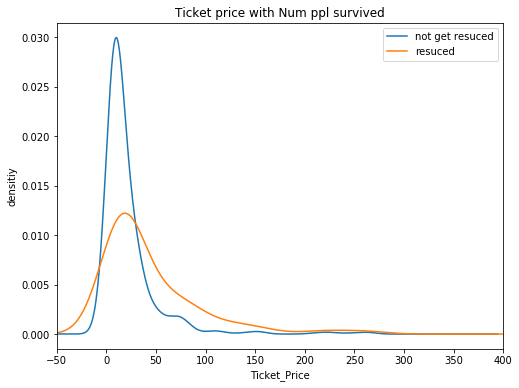

In [10]:
survived_0price=df_data.Fare[df_data.Survived==0]
survived_1price=df_data.Fare[df_data.Survived==1]
df=DataFrame({'not get resuced':survived_0price,
              'resuced':survived_1price})

df.plot(kind='kde',xlim=[-50,400],figsize=(8,6))

plt.xlabel("Ticket_Price") 
plt.ylabel("densitiy")
plt.title("Ticket price with Num ppl survived")
plt.show()

Sadly, The more you paid seem you will have more change to be resuced

#### <a name="Q5">5. Does age do with rate of getting resuced? Since younger people is stronger or older people may have more money.</a>

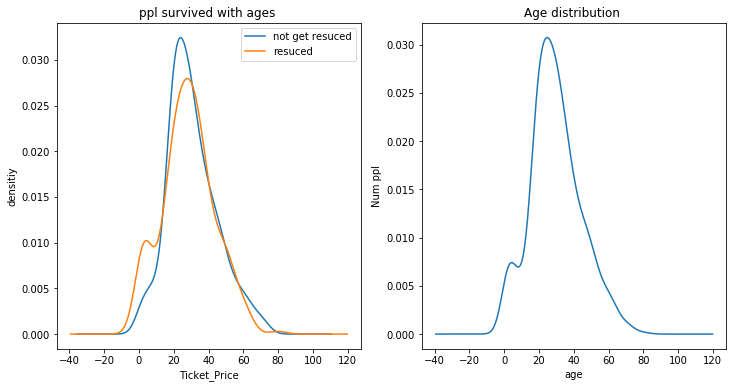

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

survived_0age=df_data.Age[df_data.Survived==0]
survived_1age=df_data.Age[df_data.Survived==1]

df=DataFrame({'not get resuced':survived_0age,'resuced':survived_1age})
p1= df.plot(kind='kde',figsize=(12,6),ax=axes[0])
p1.set_xlabel("Ticket_Price") 
p1.set_ylabel("densitiy")
p1.set_title("ppl survived with ages ")

p2= df_data.Age.plot(kind='kde',ax=axes[1])
p2.set_xlabel("age") 
p2.set_ylabel("Num ppl")
p2.set_title("Age distribution ")


plt.show()

lots 20-40 not survived. and less 10 seems got resuced how many exactly in this range?

In [12]:
df_data.Age[(df_data.Age > 20) & (df_data.Age<40)].count()

372

In [13]:
# total num of passenger 
df_data.PassengerId.count()

891

Hard to tell if they age affects resuced rate

#### <a name="Q6">6. From question 4, age 20-40 they have has sibling or they may have kids. Does that do with resuced rate? Suppose I have 10 sibling I may have less chance.Or if I have 10 kids. hard to rescued them all.</a>

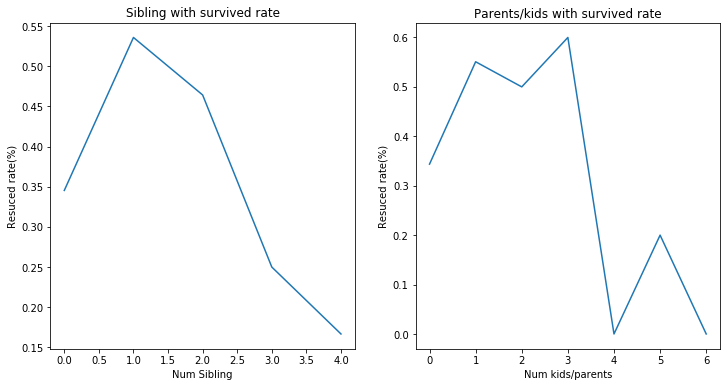

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)

survived_0SB=df_data.SibSp[df_data.Survived==0].value_counts()
survived_1SB=df_data.SibSp[df_data.Survived==1].value_counts()

total=survived_0SB + survived_1SB
survived_rate=survived_1SB/total
survived_rate=survived_rate.sort_index()

p1 = survived_rate.plot(figsize=(12,6),ax=axes[0])
p1.set_xlabel("Num Sibling") 
p1.set_ylabel("Resuced rate(%)")
p1.set_title("Sibling with survived rate")


survived_0kid=df_data.Parch[df_data.Survived==0].value_counts()
survived_1kid=df_data.Parch[df_data.Survived==1].value_counts()

#fill those no has any kid or parent with 0
survived_1kid=Series(survived_1kid,index=survived_0kid.index)
survived_1kid=survived_1kid.fillna(0)

total=survived_0kid + survived_1kid
survived_rate_wkid=survived_1kid/total
survived_rate_wkid=survived_rate_wkid.sort_index()

p2 = survived_rate_wkid.plot(figsize=(12,6),ax=axes[1])
p2.set_xlabel("Num kids/parents") 
p2.set_ylabel("Resuced rate(%)")
p2.set_title("Parents/kids with survived rate")


plt.show()

From fig above, we can infer if passenger has more than 3 kids or parents is hard to handle.
1 sibling seems has highest if more than 2 rate get siginificant down

### <a name="TT">Fix Missing Values</a> 

I also inspired by this link [Titanic Report](https://www.math.lsu.edu/system/files/Titanic%20Report.pdf) 

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### cabin has lots missing and I looked up cant find to fix this will change to Y/N cabin.

In [16]:
def set_cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='Y'
    df.loc[(df.Cabin.isnull()),'Cabin']='N'
    return df

df_data=set_cabin_type(df_data)

#### use RandomForest fill age from sklearn

In [17]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    # put more features to randoemforest for better fit
    df_age = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    age_known=df_age.loc[df_age.Age.notnull()].values 
    age_unknown=df_age.loc[df_age.Age.isnull()].values
    X=age_known[:,1:]
    y=age_known[:,0]
    
    # build model
    model = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    model.fit(X,y)
    predictedAges=model.predict(age_unknown[:,1:])
    df.loc[df.Age.isnull(),'Age']=predictedAges
    return df,model

df_data,model=set_missing_ages(df_data)  

since Some feature are strings or object need marker as numeric value

In [18]:
num_cabin = pd.get_dummies(df_data.Cabin,prefix='Cabin') 
num_embarked = pd.get_dummies(df_data['Embarked'], prefix= 'Embarked')
num_sex = pd.get_dummies(df_data['Sex'], prefix= 'Sex')
num_pclass = pd.get_dummies(df_data['Pclass'], prefix= 'Pclass')

df = pd.concat([df_data, num_cabin, num_embarked, num_sex, num_pclass], axis=1) 
#  clean prefix
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True) 

scaleing, if age gap too large may affect predicition.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
age_scale=scaler.fit(df.Age.values.reshape(-1,1))
df['Age_Scale']=scaler.fit_transform(df.Age.values.reshape(-1,1),age_scale)

fare_scale=scaler.fit(df.Fare.values.reshape(-1,1))
df['Fare_Scale']=scaler.fit_transform(df.Age.values.reshape(-1,1),fare_scale)
df.drop(['Age', 'Fare'], axis=1, inplace=True)

### <a name="ML">ML Solve Problem</a>

#### <a name="LR">Logistic Regression</a>

Similarly, for test data do what did for train data

In [20]:
from sklearn.linear_model import LogisticRegression
df_train=df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*').values 
df_feature=df_train[:,1:]

df_label=df_train[:,0]

clf=LogisticRegression(C=1.0, penalty='l1', tol=1e-6,solver='liblinear')

clf.fit(df_feature,df_label)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [21]:
df_test.loc[df_test.Fare.isnull(),'Fare']=0
df_test= set_cabin_type(df_test)
age_data = df_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
age_test=age_data[age_data.Age.isnull()].values

predictedAges = model.predict(age_test[:,1:])
df_test.loc[df_test.Age.isnull(),'Age'] = predictedAges

# use get dummies since test is 418x13 but train is 819x13
num_cabin = pd.get_dummies(df_test.Cabin, prefix= 'Cabin')
num_sex = pd.get_dummies(df_test.Sex, prefix= 'Sex')
num_pclass = pd.get_dummies(df_test.Pclass, prefix= 'Pclass')
num_embarked = pd.get_dummies(df_test.Embarked, prefix= 'Embarked')

df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1, 1), age_scale)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1, 1), fare_scale)

concated_df_test = pd.concat([df_test, num_cabin, num_embarked, num_sex, num_pclass], axis=1)
concated_df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked','Age','Fare'], axis=1, inplace=True)

In [22]:
df_test_val = concated_df_test.values

In [23]:
predict_result=clf.predict(df_test_val[:,1:])
predict_result

array([1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

construct dataframe output result csv

In [24]:
result = pd.DataFrame({'PassengerId':df_test['PassengerId'].values, 'Survived':predict_result.astype(np.int32)})
result.to_csv("predict.csv", index=False)
pd.read_csv("predict.csv")

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


construct dataframe output result csv

I have submitted [kaggle score](https://www.kaggle.com/c/titanic/leaderboard#score) predict.csv to kaggle Got 63%
Logistic regession was not good in this case, or I may made some mistakes

#### <a name="DT">Random Forest</a>

I try to imporve my score bit. 
* group sibling and kid to 'family' 
* Omit cabin not label Y/N
* fill age use median value
* fill fare use median value
* fill missing Embarked as letter S
* Since S the City has most passenger from Obersevation

In [25]:
# fill fare use median value
df_data["Fare"] = df_data["Fare"].fillna(df_data["Fare"].median())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

# group sibling and kid to 'family' 
df_data.insert(9,"Family", "Empty")
df_data["Family"] = df_data["SibSp"] + df_data["Parch"]
df_test.insert(8,"Family", "Empty")
df_test["Family"] = df_test["SibSp"] + df_test["Parch"]

#fill Embarked city
df_data['Embarked'] = df_data['Embarked'].fillna('S')

In [26]:
# Function that returns a table with the median age for passengers from a certain class, sex and title
def calc_age(df, cl, sx):
    a = df.groupby(["Pclass", "Sex"])["Age"].median()
    return a[cl][sx]

# Loops over the df and replace the missing ages (train)
for i, row in df_data.iterrows():
    if pd.isna(row['Age']) :
        newage = (calc_age(df_data, row["Pclass"], row["Sex"]))
        df_data.at[i,'Age'] = newage
    else: continue
# Same for test data
for i, row in df_test.iterrows():
    if pd.isna(row['Age']) :
        newage = (calc_age(df_test, row["Pclass"], row["Sex"]))
        df_test.at[i,'Age'] = newage
    else: continue

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

y = df_data["Survived"]

features = ["Pclass", "Sex", "Family", "Fare", "Age", "Embarked"]

#encode_train = OneHotEncoder().fit_transform(df_data[features])
#encode_test = OneHotEncoder().fit_transform(df_test[features])

# use onehot encoder
X = pd.get_dummies(df_data[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

result = pd.DataFrame({'PassengerId':df_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("predict2.csv", index=False)
pd.read_csv("predict2.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


I have submitted [kaggle score](https://www.kaggle.com/c/titanic/leaderboard#score) predict2.csv to kaggle Got 79%
16% improved by using RandomForest

### <a name="End">Difficulties Faced & Thoughts</a>

just write smoething here lol... ...or make up somethings....